In [2]:
import os
# change work directory
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/Classification


In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
from src.common.utils import load_model, load_metrics, plot_learning_curve, save_plot, save_model, save_metrics, load_cv_results, format_cv_results, plot_complexity_curve, plot_training_time

In [4]:
# Constant variables
input_dir = 'results/dataset1/model_outputs'
input_dir2 =  'results/dataset1/model_outputs2'
output_dir = 'figures/dataset1'
output_dir2 = 'figures/dataset1_2'
name = 'bank_campaign'

if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2, exist_ok=True)

# KNN

In [4]:
# load the best model param
best_model = load_model(input_dir, 'knn', name)
metrics = load_metrics(input_dir, 'knn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset1/model_outputs/knn_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/knn_bank_campaign_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
the metrics of testing dataset: {'accuracy': 0.902889050740471, 'precision': 0.6588486140724946, 'recall': 0.3256059009483667, 'f1': 0.43582510578279265}


## learning curve

In [5]:
lc_data = load_metrics(input_dir, 'knn', f'{name}_lc')

Metrics loaded successfully from results/dataset1/model_outputs/knn_bank_campaign_lc_metrics.json


Plot saved successfully at results/figures/dataset1/knn_lc_bank_campaign.png


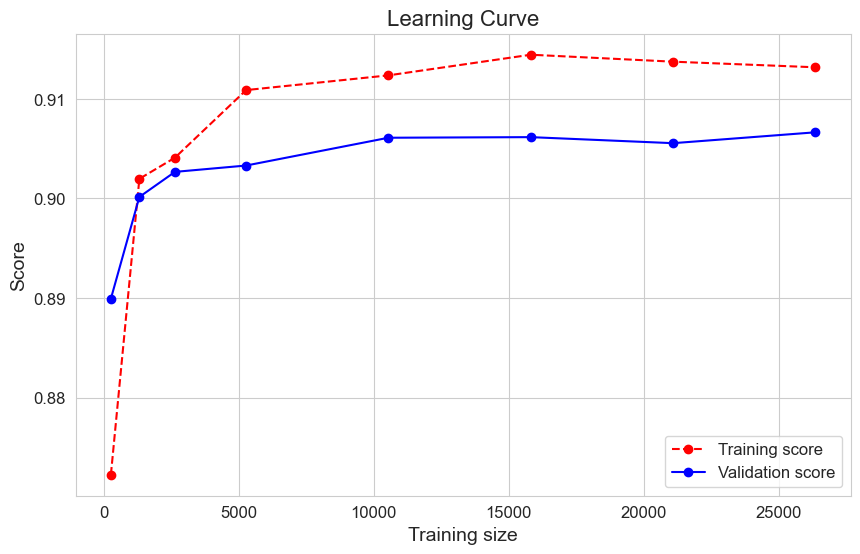

In [6]:
lc_plot = plot_learning_curve(lc_data, 'knn')
# save 
save_plot(lc_plot, output_dir, 'knn', 'lc', name)

## Complexity curve

In [18]:
input_dir

'results/dataset1/model_outputs'

In [7]:
cv_results = load_cv_results(input_dir, 'knn', name)
cv_results_df = format_cv_results(cv_results)
cv_results_df

Cross-validation results loaded successfully from results/dataset1/model_outputs/knn_bank_campaign_cv_results.pkl


,n_neighbors,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,3,0.004250,0.000911,57.720070,15.192061,0.896146,0.000669,0.940425,0.001107,0.059575,0.103854
1,5,0.003581,0.000236,57.616048,13.601267,0.900577,0.001894,0.929545,0.000808,0.070455,0.099423
2,10,0.031258,0.004964,30.846011,28.923500,0.904036,0.001507,0.917883,0.001018,0.082117,0.095964
3,15,0.017909,0.009850,48.357527,41.262971,0.905827,0.001023,0.916578,0.000729,0.083422,0.094173
4,20,0.040041,0.044199,26.587855,34.694287,0.906646,0.001569,0.913179,0.000904,0.086821,0.093354
5,25,0.033361,0.015964,53.935107,36.887237,0.906100,0.001715,0.912974,0.000799,0.087026,0.093900
6,30,0.087601,0.076702,18.177182,13.866081,0.906252,0.001062,0.911434,0.000530,0.088566,0.093748


Plot saved successfully at results/figures/dataset1/knn_cc_neigbor_bank_campaign.png


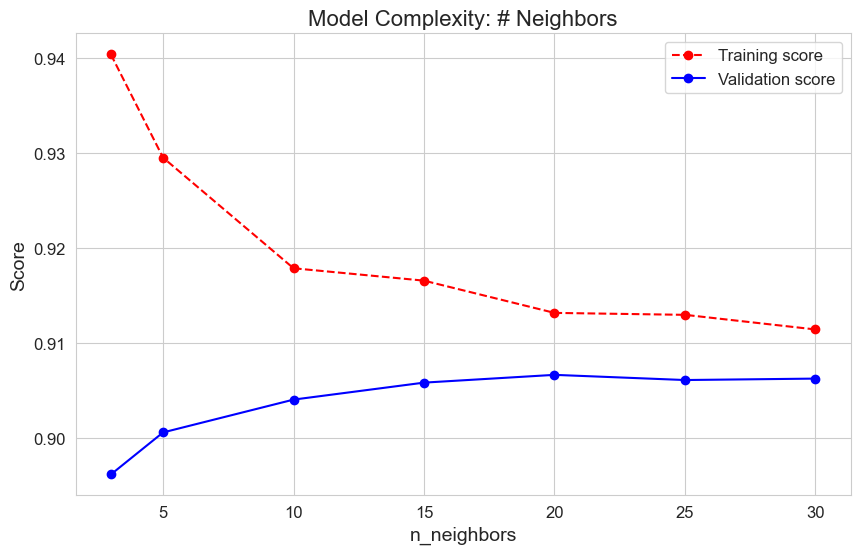

In [10]:
cc_plt, _ = plot_complexity_curve(cv_results_df, 'n_neighbors','mean_train_score', 'mean_test_score', 'Model Complexity: # Neighbors')

# save
save_plot(cc_plt, output_dir, 'knn', 'cc_neigbor', name)
# save

## Trainig time 

Plot saved successfully at results/figures/dataset1/knn_tt_neighbors_bank_campaign.png


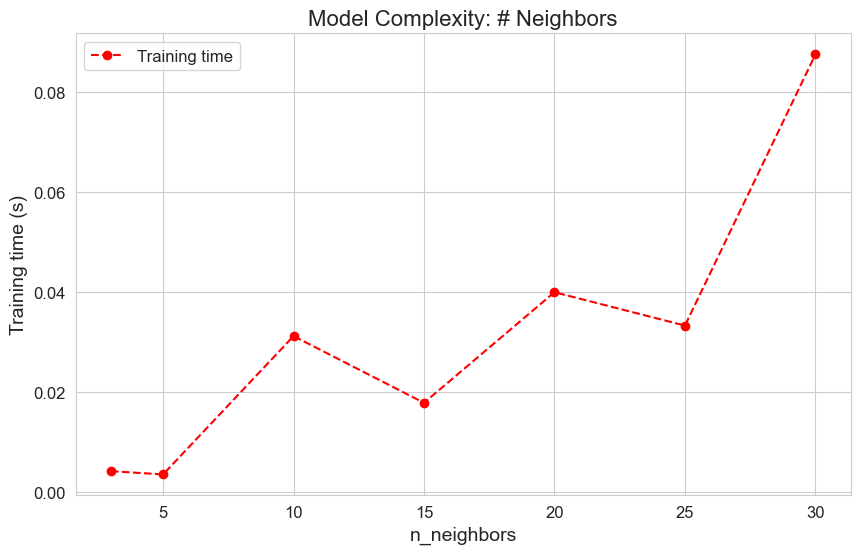

In [12]:
tt_plt = plot_training_time(cv_results_df, 'n_neighbors', 'mean_fit_time', 'Model Complexity: # Neighbors')
# save
save_plot(tt_plt, output_dir, 'knn', 'tt_neighbors', name)

# SVM

In [13]:
best_model = load_model(input_dir, 'svm', name)
metrics = load_metrics(input_dir, 'knn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset1/model_outputs/svm_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/knn_bank_campaign_metrics.json
the best model params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 17, 'shrinking': True, 'tol': 0.001, 'verbose': False}
the metrics of testing dataset: {'accuracy': 0.902889050740471, 'precision': 0.6588486140724946, 'recall': 0.3256059009483667, 'f1': 0.43582510578279265}


## learning curve

Metrics loaded successfully from results/dataset1/model_outputs/svm_bank_campaign_lc_metrics.json
Plot saved successfully at results/figures/dataset1/svm_lc_bank_campaign.png


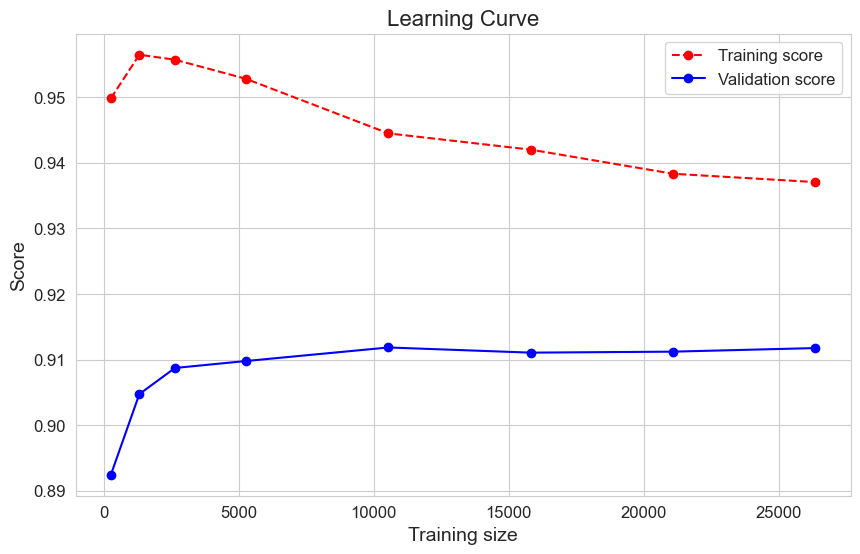

In [14]:
lc_data = load_metrics(input_dir, 'svm', f'{name}_lc')
lc_plot = plot_learning_curve(lc_data, 'svm')
# save 
save_plot(lc_plot, output_dir, 'svm', 'lc', name)

## Complexity curve

In [15]:
cv_results = load_cv_results(input_dir, 'svm', name)
cv_results_df = format_cv_results(cv_results)
cv_results_df

Cross-validation results loaded successfully from results/dataset1/model_outputs/svm_bank_campaign_cv_results.pkl


,gamma,kernel,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,scale,sigmoid,10.261258,1.386705,1.507170,0.184523,0.869651,0.003239,0.868520,0.001122,0.131480,0.130349
1,scale,rbf,11.621728,1.494478,2.039197,0.086330,0.911320,0.002202,0.924788,0.000351,0.075212,0.088680
2,scale,poly,12.082749,1.383400,1.995256,0.261155,0.910653,0.002145,0.932420,0.000502,0.067580,0.089347
3,auto,sigmoid,8.987301,0.105502,1.706227,0.025855,0.895175,0.003757,0.895607,0.000923,0.104393,0.104825
4,auto,rbf,10.537424,0.262031,2.019865,0.172845,0.909590,0.001234,0.912557,0.000460,0.087443,0.090410
5,auto,poly,9.722416,0.039365,2.010213,0.143224,0.903126,0.000991,0.905486,0.000502,0.094514,0.096874
6,0.1,sigmoid,10.424143,0.180138,1.524804,0.016072,0.855599,0.003778,0.855797,0.000455,0.144203,0.144401
7,0.1,rbf,11.593960,0.130878,2.107029,0.036062,0.911745,0.002021,0.937041,0.001142,0.062959,0.088255
8,0.1,poly,25.171526,1.552570,2.094461,0.273322,0.906737,0.003735,0.951062,0.000482,0.048938,0.093263
9,0.01,sigmoid,10.163187,0.673860,1.888738,0.033741,0.903399,0.002211,0.904067,0.000595,0.095933,0.096601


Plot saved successfully at results/figures/dataset1/svm_cc_kernel_bank_campaign.png


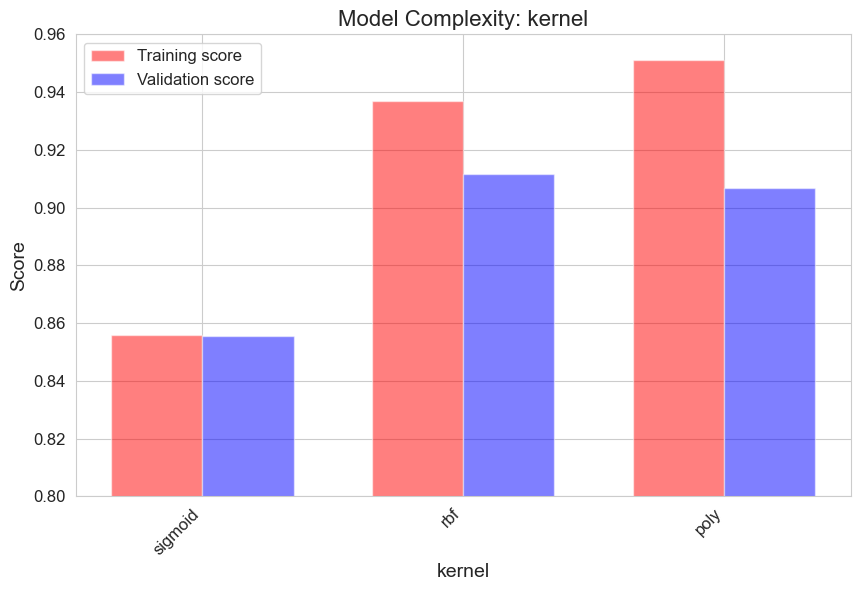

In [16]:
sub_cv_results_df = cv_results_df[cv_results_df['gamma'] == 0.1]
cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'kernel','mean_train_score', 'mean_test_score', 'Model Complexity: kernel')
ax.set_ylim(bottom=0.8, top=0.96)
# save
save_plot(cc_plt, output_dir, 'svm', 'cc_kernel', name)

Plot saved successfully at results/figures/dataset1/svm_cc_gamma_bank_campaign.png


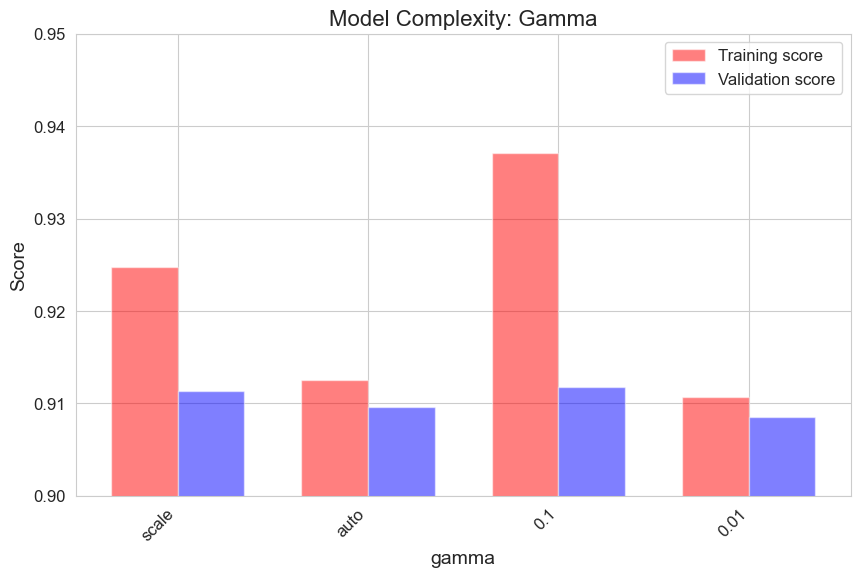

In [17]:
# gamma
sub_cv_results_df = cv_results_df[cv_results_df['kernel'] == 'rbf']

cc_plt, ax = plot_complexity_curve(sub_cv_results_df, 'gamma','mean_train_score', 'mean_test_score', 'Model Complexity: Gamma')
ax.set_ylim(bottom=0.9, top=0.95)
# save
save_plot(cc_plt, output_dir, 'svm', 'cc_gamma', name)

## Training time

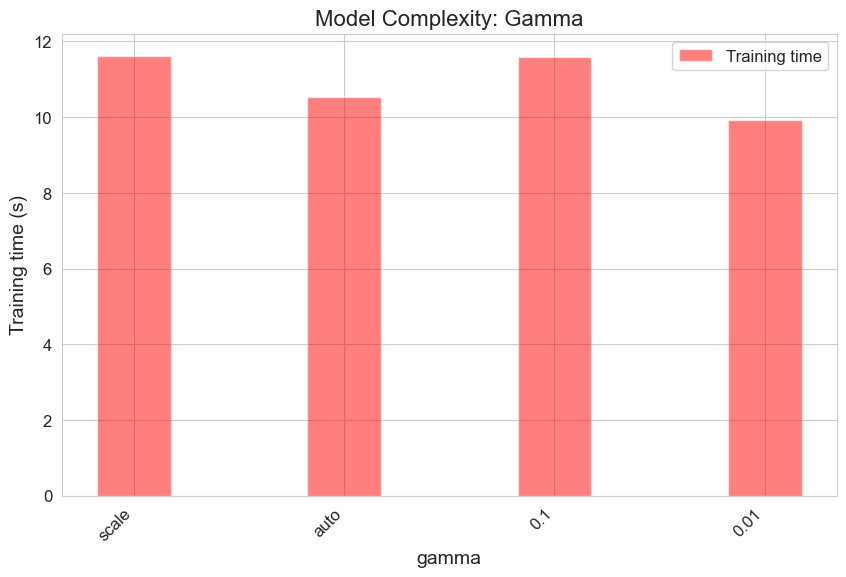

In [18]:
tt_plt = plot_training_time(sub_cv_results_df, 'gamma', 'mean_fit_time', 'Model Complexity: Gamma')

# Neural Network

In [19]:
# load the best model param
best_model = load_model(input_dir, 'nn', name)
metrics = load_metrics(input_dir, 'nn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset1/model_outputs/nn_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/nn_bank_campaign_metrics.json
the best model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': [32, 5], 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 17, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.9104151493080845, 'precision': 0.6500711237553343, 'recall': 0.4815595363540569, 'f1': 0.5532687651331719}


## learning curve

In [20]:
lc_data = load_metrics(input_dir, 'nn', f'{name}_lc')

Metrics loaded successfully from results/dataset1/model_outputs/nn_bank_campaign_lc_metrics.json


Plot saved successfully at figures/dataset1/nn_lc_bank_campaign.png


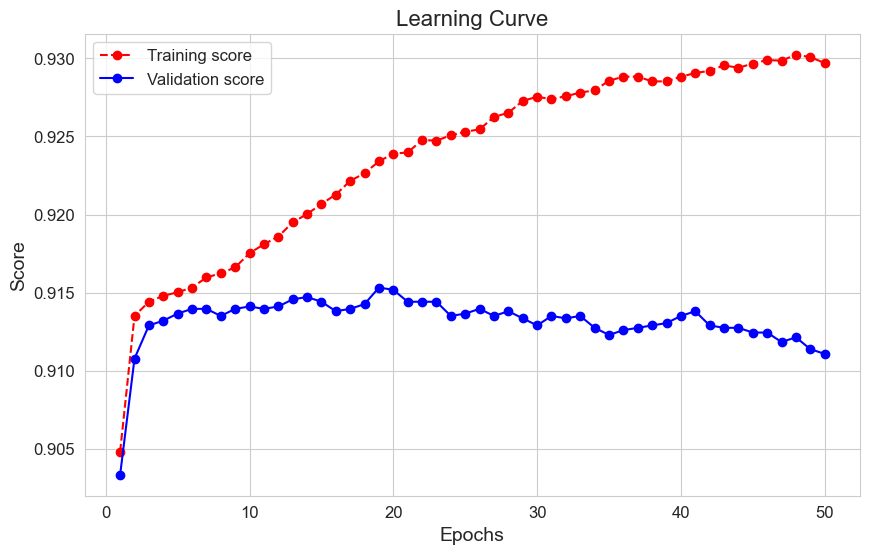

In [41]:
lc_plot = plot_learning_curve(lc_data, 'nn')
# save
save_plot(lc_plot, output_dir, 'nn', 'lc', name)

## Complexity curve

In [22]:
cv_results = load_cv_results(input_dir, 'nn', name)
cv_results_df = format_cv_results(cv_results)
cv_results_df

Cross-validation results loaded successfully from results/dataset1/model_outputs/nn_bank_campaign_cv_results.pkl


,hidden_layer_sizes,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,[5],0.933882,0.118479,0.002062,0.001136,0.912322,0.002427,0.914499,0.000408,0.085501,0.087678
1,[10],1.217556,0.334705,0.001319,0.000132,0.914385,0.002920,0.917238,0.001780,0.082762,0.085615
2,[15],1.211516,0.336302,0.001428,0.000069,0.914234,0.002304,0.918490,0.002133,0.081510,0.085766
3,[20],0.896007,0.306181,0.001635,0.000292,0.911017,0.002356,0.916502,0.004437,0.083498,0.088983
4,[25],0.837842,0.096014,0.001558,0.000075,0.912534,0.001311,0.917671,0.001440,0.082329,0.087466
5,[30],0.794572,0.237009,0.001743,0.000050,0.912656,0.001412,0.915971,0.002849,0.084029,0.087344
6,[35],0.947479,0.174421,0.002067,0.000426,0.913202,0.002127,0.917344,0.002723,0.082656,0.086798
7,[40],1.132121,0.407438,0.001892,0.000057,0.913505,0.002890,0.919059,0.004883,0.080941,0.086495
8,[45],0.904748,0.243639,0.002642,0.001170,0.912959,0.001729,0.916146,0.003360,0.083854,0.087041
9,[50],1.275885,0.408122,0.002921,0.001535,0.913718,0.001862,0.918596,0.003563,0.081404,0.086282


Plot saved successfully at results/figures/dataset1/nn_cc_bank_campaign.png


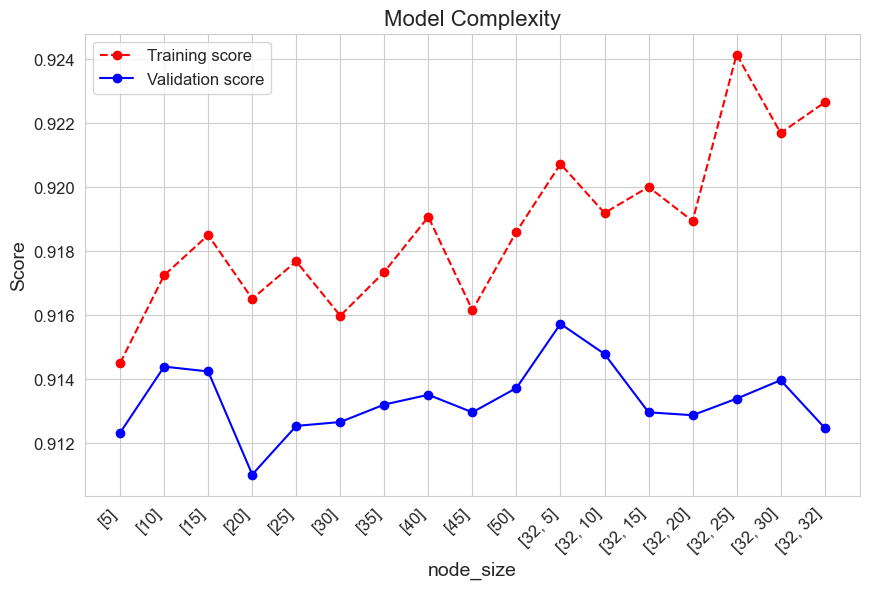

In [23]:
# turn the hidden_layer_sizes into number first and second hidden layer size
cv_results_df['node_size'] = np.arange(1, cv_results_df.shape[0]+1)
lr_plt, ax= plot_complexity_curve(cv_results_df, 'node_size','mean_train_score', 'mean_test_score', 'Model Complexity')
# set the x ticks
ax.set_xticks(cv_results_df['node_size'])
ax.set_xticklabels(cv_results_df['hidden_layer_sizes'], rotation=45, ha='right')
# save
save_plot(lr_plt, output_dir, 'nn', 'cc', name)

# Boosting

In [19]:
# load the best model param
best_model = load_model(input_dir, 'boosting', name)
metrics = load_metrics(input_dir, 'boosting', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset1/model_outputs/boosting_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/boosting_bank_campaign_metrics.json
the best model params: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 17, 'subsample': 0.7, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.9172129157562515, 'precision': 0.6700636942675159, 'recall': 0.5542676501580611, 'f1': 0.6066897347174164}


In [ ]:
import joblib
best_model.feature_importances_
# load preprocessor
preprocessor = joblib.load('data/dataset1/processed/preprocessor.joblib')
# get the feature names
preprocessor.transformers_

In [17]:
def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []
    for name, trans, column in preprocessor.transformers_:
        if name == 'num':
            feature_names.extend(column)
        elif name in ['cat', 'pdays']:
            if hasattr(trans, 'named_steps') and 'onehot' in trans.named_steps:
                encoder = trans.named_steps['onehot']
                if hasattr(encoder, 'get_feature_names_out'):
                    cat_features = encoder.get_feature_names_out(column)
                else:
                    cat_features = [f"{col}_{val}" for col, vals in zip(column, encoder.categories_) 
                                    for val in vals]
                feature_names.extend(cat_features)
            else:
                feature_names.extend(column)
    return feature_names

get_feature_names_from_preprocessor(preprocessor)

['age',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pdays_NoContact',
 'pdays_Pdays0_2',
 'pdays_Pdays3_7',
 'pdays_Pdays8_14',
 'pdays_Pdays>14',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 

In [15]:
preprocessor.transformers_

[('num',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['age',
   'duration',
   'campaign',
   'previous',
   'emp.var.rate',
   'cons.price.idx',
   'cons.conf.idx',
   'euribor3m',
   'nr.employed']),
 ('pdays',
  Pipeline(steps=[('categorize',
                   FunctionTransformer(func=<function covert_pdays_to_categorical at 0x168e7c0d0>)),
                  ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['pdays']),
 ('cat',
  Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['job',
   'marital',
   'education',
   'day_of_week',
   'default',
   'housing',
   'loan',
   'contact',
   'month',
   'poutcome'])]

# More Analysis

This section we further study KNN and NN with more hyperparameters tuning and analysis.

## KNN

As number of neighbors = 20, compare the uniform and distance weight

In [35]:
# load the best model param
best_model = load_model(input_dir2, 'knn', name)
metrics = load_metrics(input_dir2, 'knn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset1/model_outputs2/knn_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs2/knn_bank_campaign_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
the metrics of testing dataset: {'accuracy': 0.902889050740471, 'precision': 0.6588486140724946, 'recall': 0.3256059009483667, 'f1': 0.43582510578279265}


### Complexity

In [36]:
cv_results = load_cv_results(input_dir2, 'knn', name)
cv_results_df = format_cv_results(cv_results)
cv_results_df

Cross-validation results loaded successfully from results/dataset1/model_outputs2/knn_bank_campaign_cv_results.pkl


,n_neighbors,weights,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,20,uniform,0.011098,0.003788,49.971471,19.117186,0.906646,0.001569,0.913179,0.000904,0.086821,0.093354
1,20,distance,0.030481,0.025989,40.589075,24.694966,0.906131,0.001224,1.000000,0.000000,0.000000,0.093869


Plot saved successfully at figures/dataset1_2/knn_cc_neigbor_bank_campaign.png


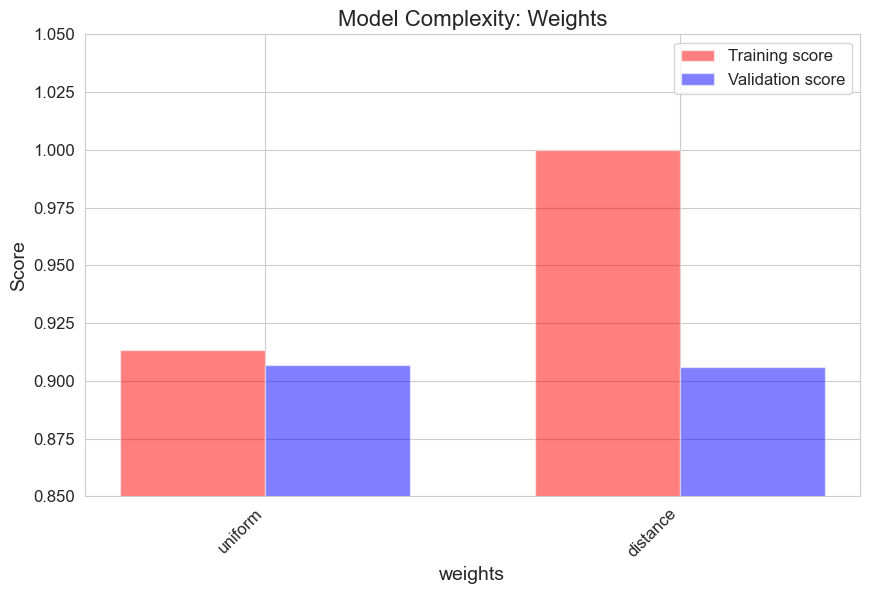

In [37]:
cc_plt, ax = plot_complexity_curve(cv_results_df, 'weights','mean_train_score', 'mean_test_score', 'Model Complexity: Weights')
ax.set_ylim(bottom=0.85)

# save
save_plot(cc_plt, output_dir2, 'knn', 'cc_neigbor', name)

## NN
Study the adaptive learning rate with different initial learning rate.

In [50]:
# load the best model param
best_model = load_model(input_dir2, 'nn', name)
metrics = load_metrics(input_dir2, 'nn', name)
print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/dataset1/model_outputs2/nn_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs2/nn_bank_campaign_metrics.json
the best model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': [32, 5], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 17, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.9104151493080845, 'precision': 0.6500711237553343, 'recall': 0.4815595363540569, 'f1': 0.5532687651331719}


Metrics loaded successfully from results/dataset1/model_outputs2/nn_bank_campaign_lc_metrics.json
Plot saved successfully at figures/dataset1_2/nn_lc_bank_campaign.png


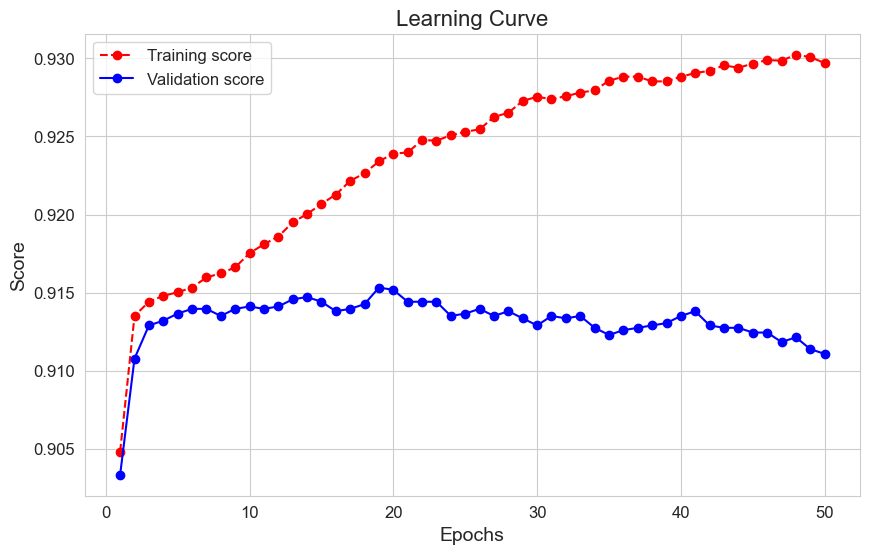

In [51]:
lc_data = load_metrics(input_dir2, 'nn', f'{name}_lc')
lc_plot = plot_learning_curve(lc_data, 'nn')
# save
save_plot(lc_plot, output_dir2, 'nn', 'lc', name)

## Complexity

In [52]:
cv_results = load_cv_results(input_dir2, 'nn', name)
cv_results_df = format_cv_results(cv_results)
cv_results_df

Cross-validation results loaded successfully from results/dataset1/model_outputs2/nn_bank_campaign_cv_results.pkl


,hidden_layer_sizes,learning_rate,learning_rate_init,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,"[32, 5]",adaptive,1.0000,0.684844,0.185755,0.002530,0.000966,0.891229,0.006435,0.890577,0.005072,0.109423,0.108771
1,"[32, 5]",adaptive,0.5000,0.684793,0.136573,0.002693,0.001368,0.888953,0.001469,0.888498,0.000780,0.111502,0.111047
2,"[32, 5]",adaptive,0.1000,0.820329,0.159598,0.002364,0.000860,0.912170,0.001441,0.917511,0.000602,0.082489,0.087830
3,"[32, 5]",adaptive,0.0800,0.898368,0.145900,0.002384,0.001004,0.910926,0.002740,0.920463,0.002173,0.079537,0.089074
4,"[32, 5]",adaptive,0.0600,0.831699,0.155245,0.002928,0.001153,0.913657,0.001811,0.920728,0.001378,0.079272,0.086343
5,"[32, 5]",adaptive,0.0400,0.830556,0.107255,0.002549,0.000907,0.912989,0.002408,0.921115,0.001921,0.078885,0.087011
6,"[32, 5]",adaptive,0.0200,0.771970,0.185505,0.002421,0.000827,0.913566,0.001058,0.920873,0.003622,0.079127,0.086434
7,"[32, 5]",adaptive,0.0100,0.791307,0.079702,0.001888,0.000062,0.914537,0.001300,0.920956,0.001523,0.079044,0.085463
8,"[32, 5]",adaptive,0.0050,0.799897,0.034786,0.001890,0.000160,0.914052,0.002991,0.920061,0.001331,0.079939,0.085948
9,"[32, 5]",adaptive,0.0010,1.232010,0.136930,0.001823,0.000038,0.915721,0.002254,0.920713,0.001246,0.079287,0.084279


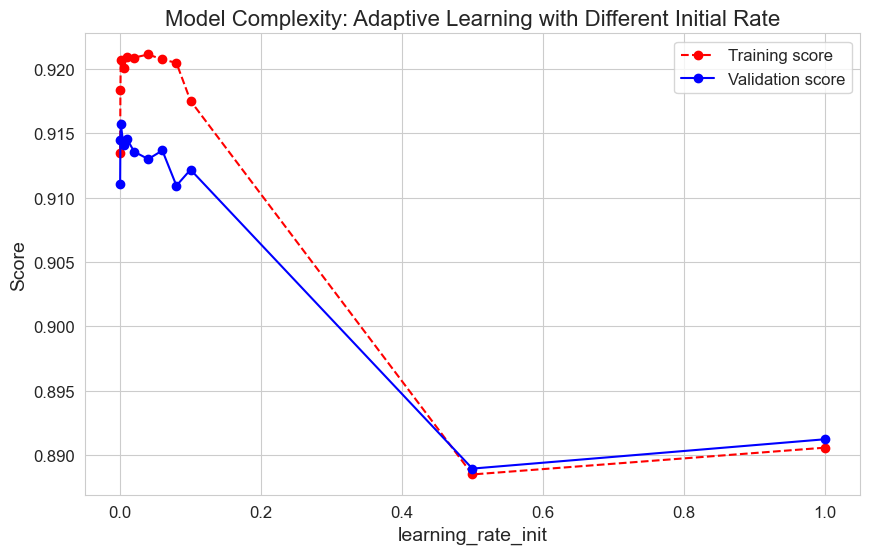

In [53]:
cc_plot, ax = plot_complexity_curve(cv_results_df, 'learning_rate_init', 'mean_train_score', 'mean_test_score', 'Model Complexity: Adaptive Learning with Different Initial Rate')